In [1]:
#importing required library
import tensorflow as tf #library to creat ml model or preprocessing(encoding)
import pandas as pd  #library to read csv/ encoding data
import matplotlib.pyplot as plt  # libray to plot data and encoding
from sklearn.model_selection import train_test_split # library to split data in fancy way

In [2]:
tf.__version__

'2.8.0'

In [3]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/shivraj8615/medical_price_prediction/main/insurance.csv')
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataframe.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [6]:
dataframe["charges"].mean(),dataframe['charges'].median()

(13270.422265141257, 9382.033)

In [7]:
#encoding
dataframe_encoded = pd.get_dummies(dataframe)
dataframe_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
#creating features and label
X = dataframe_encoded.drop('charges',axis=1)
y = dataframe_encoded['charges']

In [9]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [10]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [11]:
#creating training data and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
X_train.head(),y_train.head()

(      age     bmi  ...  region_southeast  region_southwest
 1046   43  25.080  ...                 0                 0
 682    39  35.300  ...                 0                 1
 1037   45  30.495  ...                 0                 0
 490    19  32.900  ...                 0                 1
 39     60  39.900  ...                 0                 1
 
 [5 rows x 11 columns], 1046     7325.04820
 682     40103.89000
 1037    39725.51805
 490      1748.77400
 39      48173.36100
 Name: charges, dtype: float64)

In [13]:
X_test.head(),y_test.head()

(      age     bmi  ...  region_southeast  region_southwest
 764    45  25.175  ...                 0                 0
 887    36  30.020  ...                 0                 0
 890    64  26.885  ...                 0                 0
 1293   46  25.745  ...                 0                 0
 259    19  31.920  ...                 0                 0
 
 [5 rows x 11 columns], 764      9095.06825
 887      5272.17580
 890     29330.98315
 1293     9301.89355
 259     33750.29180
 Name: charges, dtype: float64)

In [14]:
#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,name='input_layer'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name='model')

In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = ['mae'])

In [16]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 2ms/step - loss: 8777.4834 - mae: 8777.4834
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 7641.8481 - mae: 7641.8481
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 7731.8784 - mae: 7731.8784
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 7760.6655 - mae: 7760.6655
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 7806.6846 - mae: 7806.6846
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 7612.6401 - mae: 7612.6401
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 7972.0991 - mae: 7972.0991
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 7629.5015 - mae: 7629.5015
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 7610.6475 - mae: 7610.6475
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 7928.2021 - mae: 7928.2021

In [17]:
model.evaluate(X_test,y_test)

14/14 [==============================] - 0s 5ms/step - loss: 7247.4048 - mae: 7247.4048


[7247.40478515625, 7247.40478515625]

In [18]:
y_pred = model.predict(X_test)
y_pred

array([[ 7234.5244 ],
       [ 4422.326  ],
       [12287.477  ],
       [ 7486.248  ],
       [ 3181.9873 ],
       [ 3658.7214 ],
       [ 1429.2438 ],
       [ 9405.195  ],
       [ 3542.1162 ],
       [ 7946.272  ],
       [ 6657.2144 ],
       [ 5951.6294 ],
       [ 3509.131  ],
       [ 9144.832  ],
       [10856.884  ],
       [ 9125.245  ],
       [ 7208.8457 ],
       [ 8999.953  ],
       [ 6882.6763 ],
       [ 8200.175  ],
       [ 4136.842  ],
       [ 6201.328  ],
       [  907.3569 ],
       [ 1427.2616 ],
       [ 8300.078  ],
       [ 7955.231  ],
       [ 8824.826  ],
       [ 3727.6052 ],
       [ 7563.8506 ],
       [  852.1773 ],
       [ 6606.744  ],
       [ 8433.704  ],
       [ 1372.3157 ],
       [ 4751.0674 ],
       [ 2644.27   ],
       [ 5768.633  ],
       [ 1957.7285 ],
       [ 6092.442  ],
       [10425.413  ],
       [ 6783.9395 ],
       [ 2906.5413 ],
       [ 1863.9722 ],
       [ 8374.503  ],
       [ 8955.506  ],
       [ 4251.013  ],
       [ 9

In [19]:
y_pred.mean()

5803.0327

In [20]:
mae = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=7247.405>

In [21]:
mse = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=169850130.0>

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               1200      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


##creating some experiments to create efficient model
steps to create model experiment
1. Changing optimizer function from SGD to Adam
2.Adding an extra layer in our model
3. Training it for more time(increasing epochs time)
4. Now trying to add activation function
5. Training it for more time

In [23]:
#creating model 2
model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,name='input_layer'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name='model_2')
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 3ms/step - loss: 13353.0322 - mae: 13353.0322
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 13308.3955 - mae: 13308.3955
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 13252.1318 - mae: 13252.1318
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 13177.7295 - mae: 13177.7295
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 13080.8359 - mae: 13080.8359
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 12957.0547 - mae: 12957.0547
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 12805.0674 - mae: 12805.0674
Epoch 8/100
28/28 [==============================] - 0s 4ms/step - loss: 12622.4209 - mae: 12622.4209
Epoch 9/100
28/28 [==============================] - 0s 5ms/step - loss: 12408.7939 - mae: 12408.7939
Epoch 10/100
28/28 [==============================] - 0s 8ms/step - loss: 12163.45

In [24]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (32, 100)                 1200      
                                                                 
 output_layer (Dense)        (32, 1)                   101       
                                                                 
Total params: 1,301
Trainable params: 1,301
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_2.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 6801.3667 - mae: 6801.3667


[6801.36669921875, 6801.36669921875]

In [26]:
y_2_pred = model_2.predict(X_test)
y_2_pred

array([[ 9266.96  ],
       [ 7401.4365],
       [13076.621 ],
       [ 9414.581 ],
       [ 4797.456 ],
       [ 7303.254 ],
       [ 4070.06  ],
       [12708.43  ],
       [ 5701.855 ],
       [10042.144 ],
       [ 6901.733 ],
       [ 8495.194 ],
       [ 6161.8584],
       [10343.464 ],
       [12564.003 ],
       [10332.93  ],
       [10297.638 ],
       [10234.568 ],
       [ 9271.811 ],
       [ 9188.344 ],
       [ 5620.578 ],
       [ 8829.726 ],
       [ 4107.699 ],
       [ 5142.091 ],
       [10283.747 ],
       [10892.662 ],
       [11884.554 ],
       [ 6080.9727],
       [ 9672.156 ],
       [ 3955.993 ],
       [ 8488.301 ],
       [11333.898 ],
       [ 4697.6533],
       [ 6380.6226],
       [ 5506.2124],
       [ 9330.278 ],
       [ 4562.7046],
       [ 8721.817 ],
       [10899.52  ],
       [ 8092.444 ],
       [ 4695.1   ],
       [ 4883.622 ],
       [11273.279 ],
       [11477.994 ],
       [ 7095.0923],
       [11555.16  ],
       [ 4936.895 ],
       [ 5476

In [27]:
mae_2 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_2_pred))
mae_2 

<tf.Tensor: shape=(), dtype=float32, numpy=6801.367>

In [28]:
mse_2 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_2_pred))
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=151768640.0>

In [29]:
#creating model 3
model_3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,name='input_layer'),
                             tf.keras.layers.Dense(10,name='hidden_layer'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name='model_3')
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])
model_3.fit(X_train,y_train,epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 2ms/step - loss: 13331.1260 - mae: 13331.1260
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 13212.6553 - mae: 13212.6553
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 12995.2432 - mae: 12995.2432
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 12595.9521 - mae: 12595.9521
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 11930.3027 - mae: 11930.3027
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 10942.1953 - mae: 10942.1953
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 9747.8262 - mae: 9747.8262
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 8581.3291 - mae: 8581.3291
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 7784.9688 - mae: 7784.9688
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 7518.5356 - ma

In [30]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (32, 100)                 1200      
                                                                 
 hidden_layer (Dense)        (32, 10)                  1010      
                                                                 
 output_layer (Dense)        (32, 1)                   11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [31]:
model_3.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 5596.3613 - mae: 5596.3613


[5596.361328125, 5596.361328125]

In [32]:
y_3_pred = model_3.predict(X_test)
y_3_pred

array([[10134.024  ],
       [ 6330.979  ],
       [18167.277  ],
       [ 9893.472  ],
       [ 5369.5234 ],
       [ 4849.153  ],
       [ 2023.3309 ],
       [13030.544  ],
       [ 4985.595  ],
       [10598.493  ],
       [ 9472.785  ],
       [ 7959.654  ],
       [ 4993.115  ],
       [13641.905  ],
       [16167.8125 ],
       [13599.512  ],
       [10342.797  ],
       [13798.985  ],
       [ 9608.583  ],
       [12530.559  ],
       [ 4787.456  ],
       [ 8042.279  ],
       [  821.46906],
       [ 2608.8696 ],
       [11434.024  ],
       [11440.637  ],
       [12214.26   ],
       [ 5182.8813 ],
       [10622.36   ],
       [ 1047.2544 ],
       [ 8750.771  ],
       [11906.272  ],
       [ 2239.246  ],
       [ 6343.763  ],
       [ 3140.8455 ],
       [ 8234.702  ],
       [ 2469.0032 ],
       [ 8255.026  ],
       [15466.912  ],
       [10347.367  ],
       [ 3564.7317 ],
       [ 2407.042  ],
       [11543.634  ],
       [12111.998  ],
       [ 5736.2773 ],
       [12

In [33]:
mae_3 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_3_pred))
mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=5596.362>

In [34]:
mse_3 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_3_pred))
mse_3

<tf.Tensor: shape=(), dtype=float32, numpy=126891230.0>

In [35]:
#creating model
model_4 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,name='input_layer'),
                             tf.keras.layers.Dense(10,name='hidden_layer'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name='model_4')
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])
model_4.fit(X_train,y_train,epochs=500)

Epoch 1/500
28/28 [==============================] - 0s 2ms/step - loss: 13339.9355 - mae: 13339.9355
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 13214.5234 - mae: 13214.5234
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 12987.6631 - mae: 12987.6631
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 12580.3525 - mae: 12580.3525
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 11904.9160 - mae: 11904.9160
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 10915.4932 - mae: 10915.4932
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 9737.0391 - mae: 9737.0391
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 8572.3857 - mae: 8572.3857
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 7773.2217 - mae: 7773.2217
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 7546.6890 - ma

In [36]:
model_4.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 3239.1157 - mae: 3239.1157


[3239.11572265625, 3239.11572265625]

In [37]:
y_4_pred = model_4.predict(X_test)
y_4_pred

array([[ 9150.696  ],
       [ 5909.0083 ],
       [44127.39   ],
       [ 9141.055  ],
       [32312.826  ],
       [ 5695.3613 ],
       [ 1074.879  ],
       [13260.769  ],
       [ 3477.9    ],
       [10081.959  ],
       [35565.195  ],
       [ 7692.3906 ],
       [ 4119.572  ],
       [40784.83   ],
       [43126.34   ],
       [40451.438  ],
       [10446.704  ],
       [40284.98   ],
       [ 8463.542  ],
       [38658.22   ],
       [ 3957.9485 ],
       [ 7890.161  ],
       [  702.38446],
       [ 3135.3918 ],
       [10679.271  ],
       [11083.257  ],
       [12002.755  ],
       [ 4812.7812 ],
       [ 9748.791  ],
       [  507.77066],
       [ 8115.86   ],
       [11475.995  ],
       [ 1913.1698 ],
       [ 5027.7944 ],
       [ 2912.8025 ],
       [ 8757.672  ],
       [ 1783.2957 ],
       [ 7702.573  ],
       [41261.887  ],
       [36974.918  ],
       [ 3017.791  ],
       [ 2376.24   ],
       [11407.979  ],
       [11284.177  ],
       [ 5536.4087 ],
       [11

In [38]:
mae_4 = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_4_pred))
mae_4

<tf.Tensor: shape=(), dtype=float32, numpy=3239.1157>

In [39]:
mse_4 = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_4_pred))
mse_4

<tf.Tensor: shape=(), dtype=float32, numpy=44655330.0>

In [40]:
#model creation
model_5 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation = 'relu',name='input_layer'),
                             tf.keras.layers.Dense(10,activation = 'relu',name='hidden_layer'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name='model_5')
model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])
model_5.fit(X_train,y_train,epochs=500)

Epoch 1/500
28/28 [==============================] - 1s 2ms/step - loss: 13379.8848 - mae: 13379.8848
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 13376.1582 - mae: 13376.1582
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 13366.8672 - mae: 13366.8672
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 13341.5654 - mae: 13341.5654
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 13295.6572 - mae: 13295.6572
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 13218.8916 - mae: 13218.8916
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 13099.3125 - mae: 13099.3125
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 12926.9238 - mae: 12926.9238
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 12689.2832 - mae: 12689.2832
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 12376.60

In [41]:
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (32, 100)                 1200      
                                                                 
 hidden_layer (Dense)        (32, 10)                  1010      
                                                                 
 output_layer (Dense)        (32, 1)                   11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_5.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 3294.7007 - mae: 3294.7007


[3294.70068359375, 3294.70068359375]

In [43]:
y_5_pred = model_5.predict(X_test)
y_5_pred

array([[ 9224.879 ],
       [ 5421.9614],
       [35558.27  ],
       [ 9344.763 ],
       [21114.535 ],
       [ 5613.439 ],
       [ 1598.7229],
       [13877.962 ],
       [ 3050.2131],
       [10349.2   ],
       [25564.533 ],
       [ 7302.3975],
       [ 3782.551 ],
       [31805.773 ],
       [34479.785 ],
       [31335.738 ],
       [10102.357 ],
       [30989.56  ],
       [ 8249.734 ],
       [28834.15  ],
       [ 4358.695 ],
       [ 7513.376 ],
       [ 1587.7631],
       [ 3100.198 ],
       [11218.132 ],
       [11118.549 ],
       [12575.375 ],
       [ 4943.0923],
       [ 9880.516 ],
       [ 1425.9519],
       [ 8157.67  ],
       [11896.468 ],
       [ 2162.3518],
       [ 5047.3853],
       [ 2817.4968],
       [ 8034.024 ],
       [ 2087.6057],
       [ 7338.1475],
       [32112.463 ],
       [27002.273 ],
       [ 3692.9192],
       [ 2398.74  ],
       [11762.934 ],
       [12043.162 ],
       [ 5274.385 ],
       [12242.151 ],
       [ 3245.429 ],
       [ 3719

In [44]:
mae_5 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_5_pred))
mae_5

<tf.Tensor: shape=(), dtype=float32, numpy=3294.7007>

In [45]:
mse_5 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_5_pred))
mse_5

<tf.Tensor: shape=(), dtype=float32, numpy=42183680.0>

In [87]:
model_6 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,name='input_layer'),
                             tf.keras.layers.Dense(10,name='hidden_layer'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name='model_6')
model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model_6.fit(X_train,y_train,epochs=1000)


Epoch 1/1000
28/28 [==============================] - 1s 2ms/step - loss: 13345.8291 - mae: 13345.8291
Epoch 2/1000
28/28 [==============================] - 0s 2ms/step - loss: 13223.3574 - mae: 13223.3574
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 13002.8428 - mae: 13002.8428
Epoch 4/1000
28/28 [==============================] - 0s 2ms/step - loss: 12596.4121 - mae: 12596.4121
Epoch 5/1000
28/28 [==============================] - 0s 2ms/step - loss: 11910.5146 - mae: 11910.5146
Epoch 6/1000
28/28 [==============================] - 0s 2ms/step - loss: 10904.7178 - mae: 10904.7178
Epoch 7/1000
28/28 [==============================] - 0s 2ms/step - loss: 9709.8574 - mae: 9709.8574
Epoch 8/1000
28/28 [==============================] - 0s 2ms/step - loss: 8546.9756 - mae: 8546.9756
Epoch 9/1000
28/28 [==============================] - 0s 2ms/step - loss: 7779.7393 - mae: 7779.7393
Epoch 10/1000
28/28 [==============================] - 0s 2ms/step - loss: 7538

In [88]:
model_6.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 3233.2432 - mae: 3233.2432


[3233.2431640625, 3233.2431640625]

In [89]:
model_6.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               1200      
                                                                 
 hidden_layer (Dense)        (None, 10)                1010      
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [90]:
y_6_pred = model_6.predict(X_test)
y_6_pred

array([[ 9201.817  ],
       [ 5946.1846 ],
       [44217.035  ],
       [ 9179.517  ],
       [32310.322  ],
       [ 5670.3706 ],
       [ 1119.1556 ],
       [13293.913  ],
       [ 3550.4612 ],
       [10112.623  ],
       [35598.223  ],
       [ 7710.873  ],
       [ 4157.677  ],
       [40773.     ],
       [43158.598  ],
       [40461.145  ],
       [10452.855  ],
       [40320.832  ],
       [ 8531.0625 ],
       [38719.203  ],
       [ 3971.7656 ],
       [ 7912.629  ],
       [  713.78906],
       [ 3108.8706 ],
       [10724.015  ],
       [11129.169  ],
       [12061.547  ],
       [ 4816.932  ],
       [ 9796.89   ],
       [  524.63635],
       [ 8145.1606 ],
       [11534.543  ],
       [ 1925.4451 ],
       [ 5078.227  ],
       [ 2928.9714 ],
       [ 8752.128  ],
       [ 1817.5859 ],
       [ 7752.755  ],
       [41339.88   ],
       [36991.117  ],
       [ 3014.8567 ],
       [ 2372.129  ],
       [11452.084  ],
       [11360.738  ],
       [ 5538.2886 ],
       [11

In [91]:
mae_6=tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_6_pred))
mae_6

<tf.Tensor: shape=(), dtype=float32, numpy=3233.2434>

In [92]:
mse_6 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_6_pred))
mse_6

<tf.Tensor: shape=(), dtype=float32, numpy=44740580.0>

In [52]:
#model creation
model_7 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation = 'relu',name='input_layer'),
                             tf.keras.layers.Dense(10,activation = 'relu',name='hidden_layer'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name='model_7')
model_7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])
model_7.fit(X_train,y_train,epochs=500)

Epoch 1/500
28/28 [==============================] - 0s 2ms/step - loss: 13186.5791 - mae: 13186.5791
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 10690.1738 - mae: 10690.1738
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 7633.7075 - mae: 7633.7075
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 7493.8931 - mae: 7493.8931
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 7378.1396 - mae: 7378.1396
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 7263.6255 - mae: 7263.6255
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 7149.0581 - mae: 7149.0581
Epoch 8/500
28/28 [==============================] - 0s 3ms/step - loss: 7004.8389 - mae: 7004.8389
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 6849.9937 - mae: 6849.9937
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 6703.9409 - mae: 6703.

In [53]:
model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (32, 100)                 1200      
                                                                 
 hidden_layer (Dense)        (32, 10)                  1010      
                                                                 
 output_layer (Dense)        (32, 1)                   11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_7.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 1822.4791 - mae: 1822.4791


[1822.4791259765625, 1822.4791259765625]

In [55]:
y_7_pred = model_7.predict(X_test)
y_7_pred

array([[ 9078.898 ],
       [ 5244.0405],
       [31322.686 ],
       [ 9287.018 ],
       [26673.48  ],
       [ 4538.079 ],
       [ 2112.764 ],
       [14162.25  ],
       [ 3725.563 ],
       [10279.908 ],
       [18787.414 ],
       [ 7261.573 ],
       [ 3940.935 ],
       [54604.492 ],
       [56640.344 ],
       [48631.176 ],
       [ 9787.487 ],
       [44249.348 ],
       [ 8209.003 ],
       [24074.506 ],
       [ 5059.942 ],
       [ 7433.9414],
       [ 1253.7026],
       [ 2776.7249],
       [11098.06  ],
       [10959.594 ],
       [12697.517 ],
       [ 5084.0996],
       [ 9727.095 ],
       [ 1125.5457],
       [ 8261.994 ],
       [11889.21  ],
       [ 2047.468 ],
       [ 5698.9536],
       [ 2855.6416],
       [ 7477.1436],
       [ 2617.8652],
       [ 7314.7065],
       [23806.559 ],
       [38002.35  ],
       [ 4690.018 ],
       [ 2648.708 ],
       [11707.891 ],
       [12176.312 ],
       [ 4892.7954],
       [12387.36  ],
       [ 3590.0608],
       [ 4374

In [56]:
mae_7 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_7_pred))
mae_7

<tf.Tensor: shape=(), dtype=float32, numpy=1822.4792>

In [57]:
mse_7 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_7_pred))
mse_7

<tf.Tensor: shape=(), dtype=float32, numpy=23538368.0>

In [58]:
#model creation
model_8 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation = 'relu',name='input_layer'),
                             tf.keras.layers.Dense(50,activation = 'relu',name='hidden_layer'),
                             tf.keras.layers.Dense(10,activation = 'relu',name='hidden_layer2'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name='model_8')
model_8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])
model_8.fit(X_train,y_train,epochs=500)

Epoch 1/500
28/28 [==============================] - 0s 2ms/step - loss: 11676.9512 - mae: 11676.9512
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 7799.9829 - mae: 7799.9829
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 7361.4429 - mae: 7361.4429
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 7117.5552 - mae: 7117.5552
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 6834.3662 - mae: 6834.3662
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 6539.6943 - mae: 6539.6943
Epoch 7/500
28/28 [==============================] - 0s 2ms/step - loss: 6372.4805 - mae: 6372.4805
Epoch 8/500
28/28 [==============================] - 0s 3ms/step - loss: 6329.9526 - mae: 6329.9526
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 6049.7695 - mae: 6049.7695
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 5766.3604 - mae: 5766.36

In [59]:
model_8.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 1410.8735 - mae: 1410.8735


[1410.87353515625, 1410.87353515625]

In [60]:
model_8.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               1200      
                                                                 
 hidden_layer (Dense)        (None, 50)                5050      
                                                                 
 hidden_layer2 (Dense)       (None, 10)                510       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 6,771
Trainable params: 6,771
Non-trainable params: 0
_________________________________________________________________


In [61]:
y_8_pred = model_8.predict(X_test)
y_8_pred

array([[ 9107.928 ],
       [ 5301.0435],
       [29146.344 ],
       [ 9354.483 ],
       [34342.676 ],
       [ 4616.4565],
       [ 2145.8354],
       [13994.339 ],
       [ 3736.5088],
       [10345.356 ],
       [17495.018 ],
       [ 7307.5537],
       [ 3974.951 ],
       [46708.07  ],
       [49016.89  ],
       [44887.324 ],
       [ 9882.173 ],
       [43323.062 ],
       [ 8278.282 ],
       [21401.305 ],
       [ 5125.5015],
       [ 7450.01  ],
       [ 1294.7528],
       [ 2852.0647],
       [11151.38  ],
       [10986.056 ],
       [12577.254 ],
       [ 5171.1733],
       [ 9765.651 ],
       [ 1169.6061],
       [ 8327.724 ],
       [11796.314 ],
       [ 2089.9448],
       [ 5778.913 ],
       [ 2914.9524],
       [ 7504.2593],
       [ 2653.3513],
       [ 7312.333 ],
       [23721.975 ],
       [39027.414 ],
       [ 4735.896 ],
       [ 2712.469 ],
       [11646.456 ],
       [12058.065 ],
       [ 4970.894 ],
       [12265.476 ],
       [ 3657.7192],
       [ 4433

In [62]:
mae_8 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_8_pred))
mae_8

<tf.Tensor: shape=(), dtype=float32, numpy=1410.8738>

In [63]:
mse_8 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_8_pred))
mse_8

<tf.Tensor: shape=(), dtype=float32, numpy=20144914.0>

In [64]:
#model creation
model_9 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation = 'relu',name='input_layer'),
                             tf.keras.layers.Dense(50,activation = 'relu',name='hidden_layer'),
                             tf.keras.layers.Dense(30,activation='relu',name='hidden_layer1'),
                             tf.keras.layers.Dense(10,activation = 'relu',name='hidden_layer2'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name='model_9')
model_9.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])
model_9.fit(X_train,y_train,epochs=600)

Epoch 1/600
28/28 [==============================] - 1s 3ms/step - loss: 12117.2031 - mae: 12117.2031
Epoch 2/600
28/28 [==============================] - 0s 2ms/step - loss: 7782.1870 - mae: 7782.1870
Epoch 3/600
28/28 [==============================] - 0s 3ms/step - loss: 7340.7026 - mae: 7340.7026
Epoch 4/600
28/28 [==============================] - 0s 2ms/step - loss: 7080.5415 - mae: 7080.5415
Epoch 5/600
28/28 [==============================] - 0s 2ms/step - loss: 6716.9883 - mae: 6716.9883
Epoch 6/600
28/28 [==============================] - 0s 2ms/step - loss: 6469.4971 - mae: 6469.4971
Epoch 7/600
28/28 [==============================] - 0s 2ms/step - loss: 6318.8335 - mae: 6318.8335
Epoch 8/600
28/28 [==============================] - 0s 3ms/step - loss: 6020.4531 - mae: 6020.4531
Epoch 9/600
28/28 [==============================] - 0s 3ms/step - loss: 5587.8413 - mae: 5587.8413
Epoch 10/600
28/28 [==============================] - 0s 2ms/step - loss: 4646.9209 - mae: 4646.92

In [65]:
model_9.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (32, 100)                 1200      
                                                                 
 hidden_layer (Dense)        (32, 50)                  5050      
                                                                 
 hidden_layer1 (Dense)       (32, 30)                  1530      
                                                                 
 hidden_layer2 (Dense)       (32, 10)                  310       
                                                                 
 output_layer (Dense)        (32, 1)                   11        
                                                                 
Total params: 8,101
Trainable params: 8,101
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_9.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 1505.7002 - mae: 1505.7002


[1505.7001953125, 1505.7001953125]

In [67]:
y_9_pred = model_9.predict(X_test)
y_9_pred

array([[ 9011.513 ],
       [ 5055.093 ],
       [29376.46  ],
       [ 9149.105 ],
       [33291.76  ],
       [ 4336.4395],
       [ 2045.187 ],
       [13957.371 ],
       [ 3663.4912],
       [10170.892 ],
       [17866.885 ],
       [ 7108.6655],
       [ 3846.8328],
       [45333.06  ],
       [48280.293 ],
       [43447.723 ],
       [ 9636.796 ],
       [42569.773 ],
       [ 8086.268 ],
       [24802.871 ],
       [ 5046.8013],
       [ 7286.1226],
       [ 1221.6134],
       [ 2679.425 ],
       [11020.31  ],
       [10835.798 ],
       [12499.811 ],
       [ 5067.173 ],
       [ 9634.635 ],
       [ 1119.1008],
       [ 8096.984 ],
       [11811.866 ],
       [ 1980.7412],
       [ 5597.8115],
       [ 2798.43  ],
       [ 7373.8486],
       [ 2537.714 ],
       [ 7182.6265],
       [24519.414 ],
       [37958.086 ],
       [ 4623.159 ],
       [ 2565.455 ],
       [11577.568 ],
       [12062.244 ],
       [ 4743.6934],
       [12212.045 ],
       [ 3526.4924],
       [ 4376

In [68]:
mae_9 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_9_pred))
mae_9

<tf.Tensor: shape=(), dtype=float32, numpy=1505.7002>

In [69]:
mse_9 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_9_pred))
mse_9

<tf.Tensor: shape=(), dtype=float32, numpy=20759958.0>

In [70]:
model_10 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation = 'relu',name='input_layer'),
                             tf.keras.layers.Dense(50,activation = 'relu',name='hidden_layer'),
                             tf.keras.layers.Dense(30,activation='relu',name='hidden_layer1'),
                             tf.keras.layers.Dense(10,activation = 'relu',name='hidden_layer2'),
                             tf.keras.layers.Dense(1,name='output_layer')
],name='model_10')
model_10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                loss = tf.keras.losses.mae,
                metrics = ['mae'])
model_10.fit(X_train,y_train,epochs=600)

Epoch 1/600
28/28 [==============================] - 1s 6ms/step - loss: 9141.5645 - mae: 9141.5645
Epoch 2/600
28/28 [==============================] - 0s 4ms/step - loss: 6824.9146 - mae: 6824.9146
Epoch 3/600
28/28 [==============================] - 0s 3ms/step - loss: 5660.8154 - mae: 5660.8154
Epoch 4/600
28/28 [==============================] - 0s 5ms/step - loss: 4367.2041 - mae: 4367.2041
Epoch 5/600
28/28 [==============================] - 0s 4ms/step - loss: 4154.6655 - mae: 4154.6655
Epoch 6/600
28/28 [==============================] - 0s 4ms/step - loss: 3870.2302 - mae: 3870.2302
Epoch 7/600
28/28 [==============================] - 0s 4ms/step - loss: 4551.1606 - mae: 4551.1606
Epoch 8/600
28/28 [==============================] - 0s 3ms/step - loss: 3881.0798 - mae: 3881.0798
Epoch 9/600
28/28 [==============================] - 0s 4ms/step - loss: 3882.2102 - mae: 3882.2102
Epoch 10/600
28/28 [==============================] - 0s 4ms/step - loss: 4052.8713 - mae: 4052.8713

In [71]:
model_10.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (32, 100)                 1200      
                                                                 
 hidden_layer (Dense)        (32, 50)                  5050      
                                                                 
 hidden_layer1 (Dense)       (32, 30)                  1530      
                                                                 
 hidden_layer2 (Dense)       (32, 10)                  310       
                                                                 
 output_layer (Dense)        (32, 1)                   11        
                                                                 
Total params: 8,101
Trainable params: 8,101
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_10.evaluate(X_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 1520.6497 - mae: 1520.6497


[1520.649658203125, 1520.649658203125]

In [73]:
y_10_pred = model_10.predict(X_test)
y_10_pred

array([[ 9283.195 ],
       [ 5374.949 ],
       [27355.174 ],
       [ 9466.401 ],
       [33626.22  ],
       [ 4699.41  ],
       [ 2133.9011],
       [14045.001 ],
       [ 3819.498 ],
       [10441.604 ],
       [17462.164 ],
       [ 7286.407 ],
       [ 4080.268 ],
       [45109.645 ],
       [45897.05  ],
       [43025.816 ],
       [10039.356 ],
       [41745.7   ],
       [ 8339.705 ],
       [21489.71  ],
       [ 5095.696 ],
       [ 7558.3096],
       [ 1375.8003],
       [ 2954.7256],
       [11262.1875],
       [11106.019 ],
       [12710.649 ],
       [ 5341.3696],
       [ 9929.063 ],
       [ 1198.0769],
       [ 8351.912 ],
       [11926.444 ],
       [ 2208.6804],
       [ 5869.776 ],
       [ 3051.2505],
       [ 7627.449 ],
       [ 2624.9917],
       [ 7412.8257],
       [23316.947 ],
       [37765.805 ],
       [ 4441.018 ],
       [ 2736.8708],
       [11872.821 ],
       [12161.587 ],
       [ 5037.003 ],
       [12456.345 ],
       [ 3538.7908],
       [ 4424

In [74]:
mae_10 = tf.keras.metrics.mean_absolute_error(y_test,tf.squeeze(y_10_pred))
mae_10

<tf.Tensor: shape=(), dtype=float32, numpy=1520.6494>

In [75]:
mse_10 = tf.keras.metrics.mean_squared_error(y_test,tf.squeeze(y_10_pred))
mse_10

<tf.Tensor: shape=(), dtype=float32, numpy=20304520.0>

#now done with experiment mae is min in 1541 approx

In [76]:
model_metric = [['model',mae.numpy(),mse.numpy(),100,2],
          ['model_2',mae_2.numpy(),mse_2.numpy(),100,2],
          ['model_3',mae_3.numpy(),mse_3.numpy(),100,3],
          ['model_4',mae_4.numpy(),mse_4.numpy(),500,3],
          ['model_5',mae_5.numpy(),mse_5.numpy(),500,3],
          ['model_6',mae_6.numpy(),mse_6.numpy(),1000,3],
          ['model_7',mae_7.numpy(),mse_7.numpy(),500,3],
          ['model_8',mae_8.numpy(),mse_8.numpy(),500,4],
          ['model_9',mae_9.numpy(),mse_9.numpy(),600,5],
          ['model_10',mae_10.numpy(),mse_10.numpy(),600,5],]

In [77]:
model_performance = pd.DataFrame(model_metric,columns= ['ml_model','mae','mse','epochs','hidden_layer'])
model_performance

,ml_model,mae,mse,epochs,hidden_layer
0,model,7247.404785,169850128.0,100,2
1,model_2,6801.367188,151768640.0,100,2
2,model_3,5596.361816,126891232.0,100,3
3,model_4,3239.115723,44655328.0,500,3
4,model_5,3294.700684,42183680.0,500,3
5,model_6,3238.894043,44745600.0,1000,3
6,model_7,1822.479248,23538368.0,500,3
7,model_8,1410.873779,20144914.0,500,4
8,model_9,1505.700195,20759958.0,600,5
9,model_10,1520.649414,20304520.0,600,5


In [78]:
y_test.mean()

13048.923798052047

Text(0.5, 1.0, 'Performance on basis of epochs')

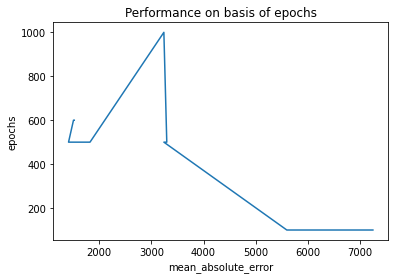

In [79]:
plt.plot(model_performance['mae'],model_performance['epochs'])
plt.xlabel('mean_absolute_error')
plt.ylabel('epochs')
plt.title('Performance on basis of epochs')

Text(0.5, 1.0, 'Performance on basis of hidden layer')

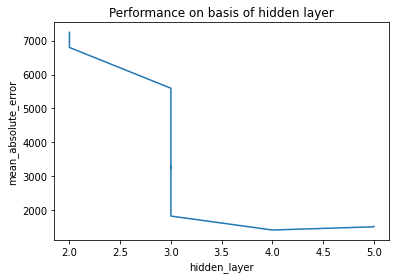

In [80]:
plt.plot(model_performance['hidden_layer'],model_performance['mae'])
plt.xlabel('hidden_layer')
plt.ylabel('mean_absolute_error')
plt.title('Performance on basis of hidden layer')

In [81]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0


In [97]:
from google.colab import files

In [99]:
!cp -r /content/medical_pred /content/drive/MyDrive/Data